# **🏠 Predicting House Prices using Linear Regression (from scratch)**

# 📘 What This Notebook Covers

 **Loads and cleans Kaggle dataset**  
 **Normalizes data manually**  
 **Implements Linear Regression using NumPy only**  
 **Runs Gradient Descent**  
 **Evaluates model using R² Score**  
 **Makes predictions on new houses**

# Import Required Libraries


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files



# Dataset


 ---------------------------------------------------------------
 Download from Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
 Place train.csv in the same directory as this notebook




In [30]:
df = pd.read_csv("train.csv")
print("dataset loaded successfully")
print(df.head())

dataset loaded successfully
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SaleP

# Select Features and Target Variable

 We'll use a few numeric features for simplicity


In [31]:
features = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath"]
target = "SalePrice"

x = df[features].values
y = df[target].values

m = len(y)

print("\nSelected Features:", features)
print("Shape of X:", x.shape)
print("Shape of y:", y.shape)


Selected Features: ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath']
Shape of X: (1460, 5)
Shape of y: (1460,)


# Feature Scaling (Standardization)


In [32]:
x_mean = np.mean(x, axis=0)
x_std  = np.std(x, axis=0)
x_norm = (x - x_mean) / x_std

y_mean = np.mean(y)
y_std = np.std(y)
y_norm = (y - y_mean) / y_std  # normalize target for better learning stability


# Hypothesis Function


In [33]:
def predict(x ,w ,b):
  return np.dot(x, w) + b


# Cost Function


In [34]:
def compute_cost(x, y, w, b):
  m = len(y)
  predictions = predict(x, w, b)
  cost = np.sum((predictions - y) **2) / (2 * m)

  return cost

# Compute Gradients


In [35]:
def compute_gradient(x, y, w, b):
    m = len(y)
    predictions = predict(x, w, b)
    dj_dw = (1 / m) * np.dot(x.T, (predictions - y))
    dj_db = (1 / m) * np.sum(predictions - y)
    return dj_dw, dj_db

# Gradient Descent Implementation

In [36]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters):
    w = w_in
    b = b_in
    cost_history = []

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db

        if i % 50 == 0:
            cost = compute_cost(x, y, w, b)
            cost_history.append(cost)
            print(f"Iteration {i:4d}: Cost={cost:.6f}")

    return w, b, cost_history

# Initialize and Train the Model

In [37]:
n = x_norm.shape[1]
w_init = np.zeros(n)
b_init = 0
alpha = 0.01
iterations = 1000

print("\nTraining Model...")
w_final, b_final, cost_history = gradient_descent(x_norm, y_norm, w_init, b_init, alpha, iterations)

print("\nTraining Complete!")
print(f"Final Weights: {w_final}")
print(f"Final Bias: {b_final}")


Training Model...
Iteration    0: Cost=0.478049
Iteration   50: Cost=0.145489
Iteration  100: Cost=0.127109
Iteration  150: Cost=0.124229
Iteration  200: Cost=0.122754
Iteration  250: Cost=0.121786
Iteration  300: Cost=0.121130
Iteration  350: Cost=0.120680
Iteration  400: Cost=0.120369
Iteration  450: Cost=0.120153
Iteration  500: Cost=0.120003
Iteration  550: Cost=0.119897
Iteration  600: Cost=0.119823
Iteration  650: Cost=0.119772
Iteration  700: Cost=0.119735
Iteration  750: Cost=0.119710
Iteration  800: Cost=0.119692
Iteration  850: Cost=0.119679
Iteration  900: Cost=0.119670
Iteration  950: Cost=0.119664

Training Complete!
Final Weights: [0.40394318 0.29524411 0.17498052 0.18290337 0.01244211]
Final Bias: 6.244015958768562e-17


# Plot Cost vs Iterations

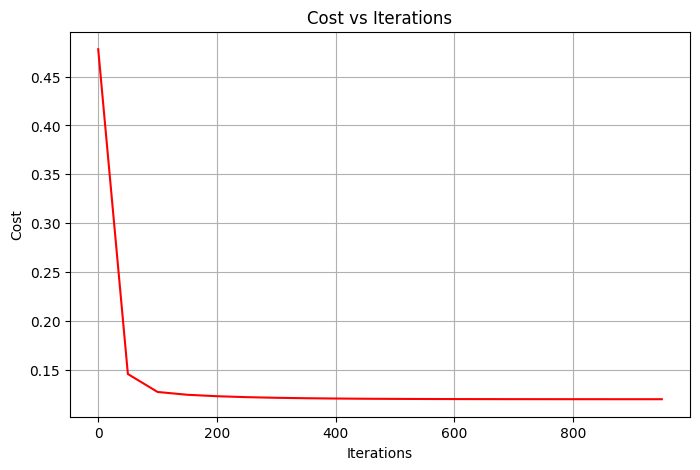

In [38]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(0, len(cost_history)*50, 50), cost_history, color='r')
plt.title("Cost vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

# Model Evaluation (R² Score)

In [39]:
y_pred_norm = predict(x_norm, w_final, b_final)
ss_total = np.sum((y_norm - np.mean(y_norm)) ** 2)
ss_res = np.sum((y_norm - y_pred_norm) ** 2)
r2_score = 1 - (ss_res / ss_total)

print(f"\nModel R² Score: {r2_score:.4f}")


Model R² Score: 0.7607


# Predict on New Data

In [40]:
new_house = np.array([[7, 2000, 2, 800, 2]])  # example new house
new_house_scaled = (new_house - x_mean) / x_std

predicted_price_norm = predict(new_house_scaled, w_final, b_final)
predicted_price = predicted_price_norm * y_std + y_mean

print(f"\nPredicted Price for new house: ${predicted_price[0]:,.2f}")


Predicted Price for new house: $220,033.37
